In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

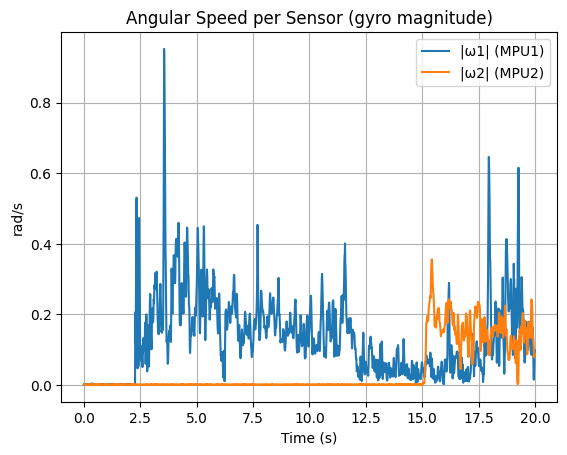

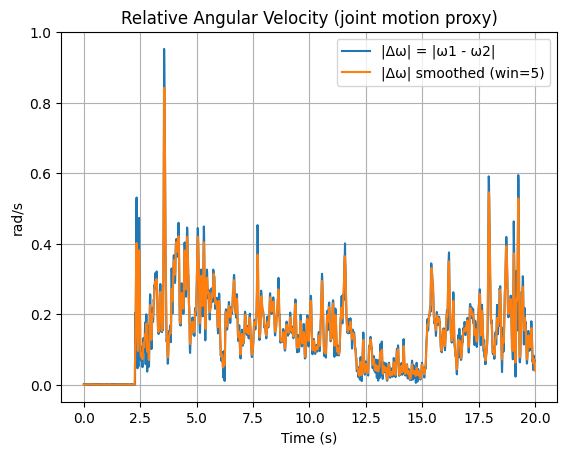

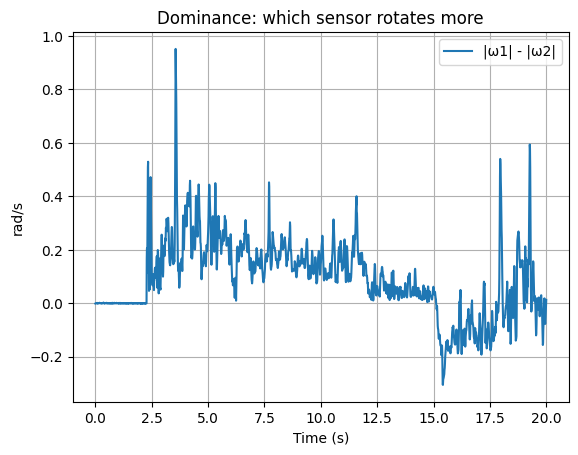

In [2]:
CSV_PATH = "dual_mpu_capture.csv"

def main():
    df = pd.read_csv(CSV_PATH)

    # Convert to numeric and drop bad rows
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df = df.dropna().reset_index(drop=True)

    # Time axis (seconds)
    t = (df["T_US"] - df["T_US"].iloc[0]) / 1e6

    # Gyro vectors (rad/s)
    w1 = df[["G1X","G1Y","G1Z"]].to_numpy()
    w2 = df[["G2X","G2Y","G2Z"]].to_numpy()

    # Magnitudes
    w1_mag = np.linalg.norm(w1, axis=1)
    w2_mag = np.linalg.norm(w2, axis=1)

    # Relative angular velocity
    dw = w1 - w2
    dw_mag = np.linalg.norm(dw, axis=1)

    # Optional: simple smoothing for readability (moving average)
    # Keep window small so you don’t hide peaks
    win = 5
    kernel = np.ones(win) / win
    dw_mag_s = np.convolve(dw_mag, kernel, mode="same")

    # -------- Plot 1: |ω1| and |ω2| ----------
    plt.figure()
    plt.plot(t, w1_mag, label="|ω1| (MPU1)")
    plt.plot(t, w2_mag, label="|ω2| (MPU2)")
    plt.title("Angular Speed per Sensor (gyro magnitude)")
    plt.xlabel("Time (s)")
    plt.ylabel("rad/s")
    plt.grid(True)
    plt.legend()

    # -------- Plot 2: |Δω| ----------
    plt.figure()
    plt.plot(t, dw_mag, label="|Δω| = |ω1 - ω2|")
    plt.plot(t, dw_mag_s, label="|Δω| smoothed (win=5)")
    plt.title("Relative Angular Velocity (joint motion proxy)")
    plt.xlabel("Time (s)")
    plt.ylabel("rad/s")
    plt.grid(True)
    plt.legend()

    # -------- Plot 3: Directional difference (optional) ----------
    # Shows which sensor is “more active” (signed-ish proxy)
    plt.figure()
    plt.plot(t, w1_mag - w2_mag, label="|ω1| - |ω2|")
    plt.title("Dominance: which sensor rotates more")
    plt.xlabel("Time (s)")
    plt.ylabel("rad/s")
    plt.grid(True)
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()